In [1]:
import torch
import numpy as np
 
print(torch.__version__) # pytorch版本
print(torch.version.cuda) # cuda版本
print(torch.cuda.is_available()) # 查看cuda是否可用

2.5.0+cpu
None
False


In [2]:
torch.zeros(3, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [3]:
torch.ones(3, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [4]:
torch.eye(3, 3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [5]:
torch.Tensor([1, 3])

tensor([1., 3.])

In [6]:
torch.IntTensor([1,2,3])

tensor([1, 2, 3], dtype=torch.int32)

In [7]:
torch.randn(3, 3)

tensor([[ 1.1019,  0.5475, -0.0287],
        [-0.4717,  0.3867, -0.1935],
        [ 0.2142, -1.1768, -0.3112]])

In [8]:
torch.randperm(10)

tensor([2, 1, 7, 3, 9, 4, 0, 5, 8, 6])

In [9]:
torch.Tensor(2, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [10]:
torch.Tensor([2, 3])

tensor([2., 3.])

In [11]:
torch.randn(2, 3)

tensor([[-0.3922, -1.2919, -0.2870],
        [-0.2046, -0.2606,  0.5020]])

In [12]:
torch.tensor(np.arange(15).reshape(3, 5))

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]], dtype=torch.int32)

In [13]:
# 标量Tensor求导
# 求 f(x) = a*x**2 + b*x + c 的导数
x = torch.tensor(-2.0, requires_grad=True)
a = torch.tensor(1.0)
b = torch.tensor(2.0)
c = torch.tensor(3.0)
y = a * torch.pow(x,2) + b * x + c
y.backward() # backward求得的梯度会存储在自变量x的grad属性中
dy_dx = x.grad
dy_dx

tensor(-2.)

In [14]:
# 非标量Tensor求导
# 求 f(x) = a*x**2 + b*x + c 的导数
x = torch.tensor([[-2.0,-1.0],[0.0,1.0]], requires_grad=True)
a = torch.tensor(1.0)
b = torch.tensor(2.0)
c = torch.tensor(3.0)
gradient=torch.tensor([[1.0,1.0],[1.0,1.0]])
y = a * torch.pow(x,2) + b * x + c
y.backward(gradient=gradient) 
dy_dx = x.grad
dy_dx

tensor([[-2.,  0.],
        [ 2.,  4.]])

In [15]:
# 使用标量求导方式解决非标量求导
# 求 f(x) = a*x**2 + b*x + c 的导数
x = torch.tensor([[-2.0,-1.0],[0.0,1.0]], requires_grad=True)
a = torch.tensor(1.0)
b = torch.tensor(2.0)
c = torch.tensor(3.0)
gradient=torch.tensor([[1.0,1.0],[1.0,1.0]])
y = a*torch.pow(x,2)+b*x+c
z=torch.sum(y*gradient)
z.backward()
dy_dx=x.grad
dy_dx

tensor([[-2.,  0.],
        [ 2.,  4.]])

In [16]:
 
import torch
 
#单个自变量求导
# 求 f(x) = a*x**4 + b*x + c 的导数
x = torch.tensor(1.0, requires_grad=True)
a = torch.tensor(1.0)
b = torch.tensor(2.0)
c = torch.tensor(3.0)
y = a * torch.pow(x, 4) + b * x + c
#create_graph设置为True,允许创建更高阶级的导数
#求一阶导
dy_dx = torch.autograd.grad(y, x, create_graph=True)[0]
#求二阶导
dy2_dx2 = torch.autograd.grad(dy_dx, x, create_graph=True)[0]
#求三阶导
dy3_dx3 = torch.autograd.grad(dy2_dx2, x)[0]
print(dy_dx.data, dy2_dx2.data, dy3_dx3)
 
 
# 多个自变量求偏导
x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(2.0, requires_grad=True)
y1 = x1 * x2
y2 = x1 + x2
#只有一个因变量,正常求偏导
dy1_dx1, dy1_dx2 = torch.autograd.grad(outputs=y1, inputs=[x1, x2], retain_graph=True)
print(dy1_dx1, dy1_dx2)
# 若有多个因变量，则对于每个因变量,会将求偏导的结果加起来
dy1_dx, dy2_dx = torch.autograd.grad(outputs=[y1, y2], inputs=[x1, x2])
dy1_dx, dy2_dx
print(dy1_dx, dy2_dx)

tensor(6.) tensor(12.) tensor(24.)
tensor(2.) tensor(1.)
tensor(3.) tensor(2.)


Epoch[1/100],loss:0.779026
Epoch[2/100],loss:0.755264
Epoch[3/100],loss:0.736668
Epoch[4/100],loss:0.721748
Epoch[5/100],loss:0.709041
Epoch[6/100],loss:0.698459
Epoch[7/100],loss:0.689645
Epoch[8/100],loss:0.682855
Epoch[9/100],loss:0.676658
Epoch[10/100],loss:0.671181
Epoch[11/100],loss:0.666561
Epoch[12/100],loss:0.664231
Epoch[13/100],loss:0.660694
Epoch[14/100],loss:0.656540
Epoch[15/100],loss:0.655596
Epoch[16/100],loss:0.652369
Epoch[17/100],loss:0.651291
Epoch[18/100],loss:0.651681
Epoch[19/100],loss:0.649549
Epoch[20/100],loss:0.648062
Epoch[21/100],loss:0.646055
Epoch[22/100],loss:0.650610
Epoch[23/100],loss:0.647600
Epoch[24/100],loss:0.648593
Epoch[25/100],loss:0.646217
Epoch[26/100],loss:0.645926
Epoch[27/100],loss:0.646362
Epoch[28/100],loss:0.647670
Epoch[29/100],loss:0.647545
Epoch[30/100],loss:0.648197
Epoch[31/100],loss:0.645838
Epoch[32/100],loss:0.645716
Epoch[33/100],loss:0.644079
Epoch[34/100],loss:0.645587
Epoch[35/100],loss:0.644703
Epoch[36/100],loss:0.647075
E

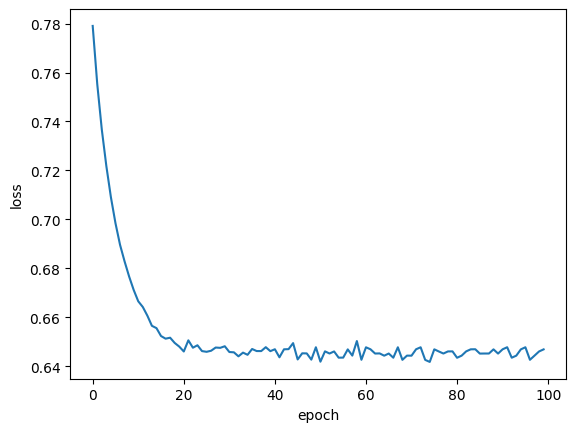

In [17]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
 
 
# Prepare the dataset
class DiabetesDateset(Dataset):
    # 加载数据集
    def __init__(self, filepath):
        xy = np.loadtxt(filepath, delimiter=',', dtype=np.float32, encoding='utf-8')
        self.len = xy.shape[0]  # shape[0]是矩阵的行数,shape[1]是矩阵的列数
        self.x_data = torch.from_numpy(xy[:, :-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])
 
    # 获取数据索引
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
 
    # 获得数据总量
    def __len__(self):
        return self.len
 
 
dataset = DiabetesDateset(r'D:\Project\基于神经网络的临近强降雨预测模型\diabetes.csv')
train_loader = DataLoader(dataset=dataset, batch_size=32, shuffle=True, num_workers=0, drop_last=True)  # num_workers为多线程
 
 
# Define the model
class FNNModel(torch.nn.Module):
    def __init__(self):
        super(FNNModel, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)  # 输入数据的特征有8个,也就是有8个维度,随后将其降维到6维
        self.linear2 = torch.nn.Linear(6, 4)  # 6维降到4维
        self.linear3 = torch.nn.Linear(4, 2)  # 4维降到2维
        self.linear4 = torch.nn.Linear(2, 1)  # 2w维降到1维
        self.sigmoid = torch.nn.Sigmoid()  # 可以视其为网络的一层,而不是简单的函数使用
 
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        x = self.sigmoid(self.linear4(x))
        return x
 
 
model = FNNModel()
 
# Define the criterion and optimizer
criterion = torch.nn.BCELoss(reduction='mean')  # 返回损失的平均值
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
 
epoch_list = []
loss_list = []
 
# Training
if __name__ == '__main__':
    for epoch in range(100):
        # i是一个epoch中第几次迭代,一共756条数据,每个mini_batch为32,所以一个epoch需要迭代23次
        # data获取的数据为(x,y)
        loss_one_epoch = 0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            y_pred = model(inputs)
            loss = criterion(y_pred, labels)
            loss_one_epoch += loss.item()
 
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        loss_list.append(loss_one_epoch / 23)
        epoch_list.append(epoch)
        print('Epoch[{}/{}],loss:{:.6f}'.format(epoch + 1, 100, loss_one_epoch / 23))
 
    # Drawing
    plt.plot(epoch_list, loss_list)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()